In [1]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno
os.getcwd()

'/Users/yumseemun/Desktop/Streamlit'

In [2]:
data=pd.read_csv('owid-covid-data.csv')
data['date']=pd.to_datetime(data['date'])
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

<AxesSubplot:>

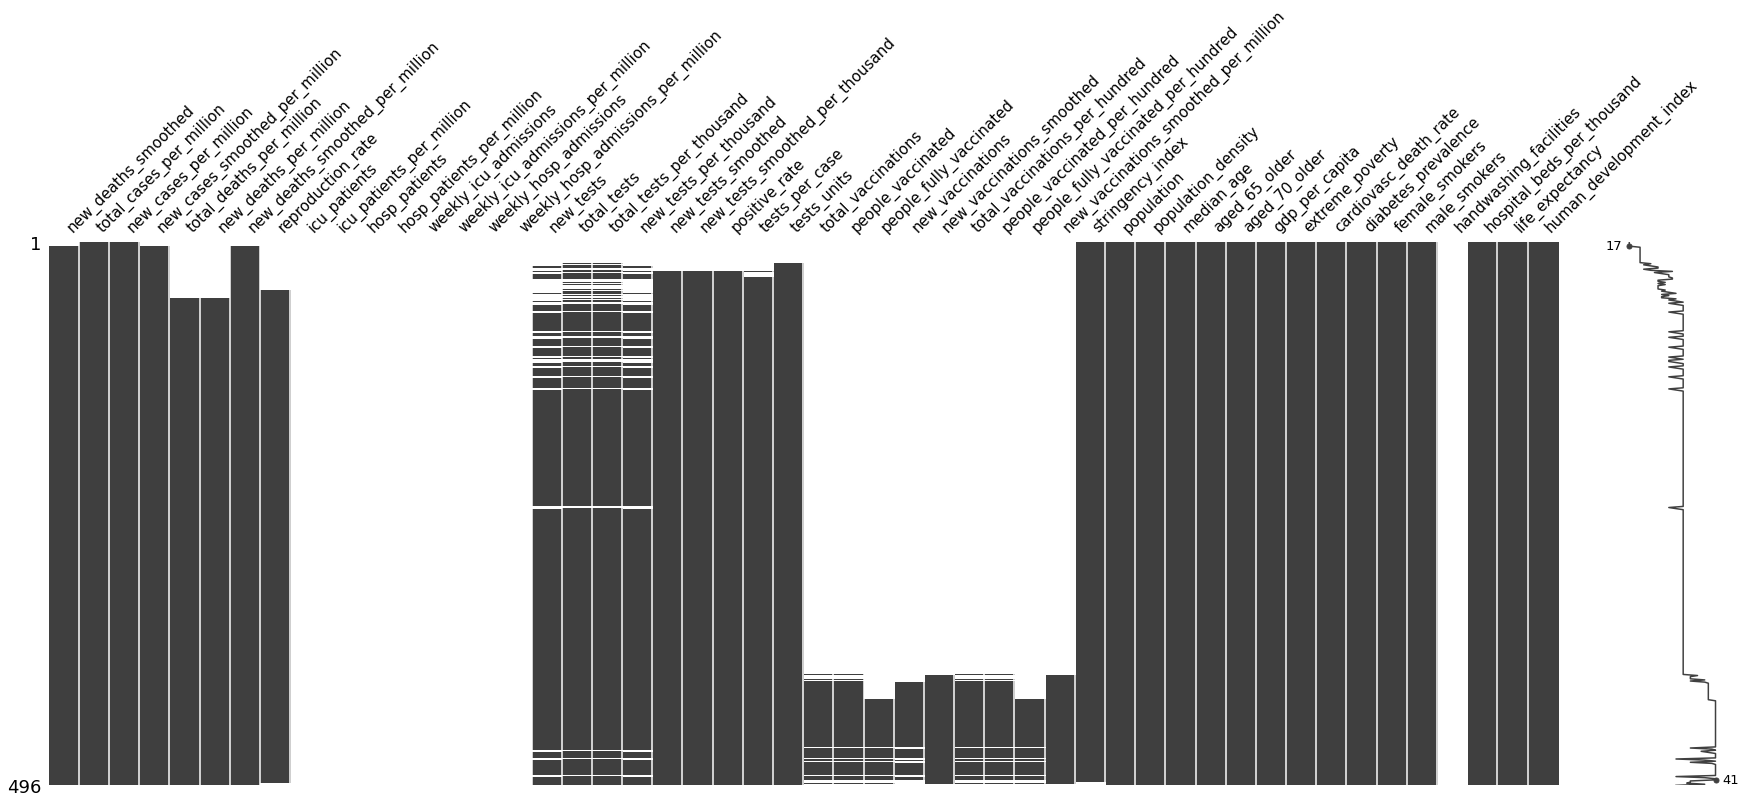

In [3]:
data_temporary=data.loc[data['location']=='Malaysia',[
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]
missingno.matrix(data_temporary,fontsize=15,figsize=(30,10))

In [4]:
#Modifying data
data['new_tests_per_hundred_thousand']=data['new_tests_per_thousand']*100
data['new_deaths_per_ten_million']=data['new_deaths_per_million']*10
data['positive_rate_per_hundred_thousand']=data['positive_rate']*1000
data['new_tests_per_hundred_thousand']=data['new_tests_per_thousand']*100

In [5]:
data.columns.tolist()[4]
print(len(data.loc[data['total_cases']>0.1]))
print(len(data.loc[:,['total_cases']]))

90353
93325


In [6]:
for i in data.columns:
    negatives={}
    try:
        negatives[i]=len(data.loc[data[i]<0])
    except:
        print('{} not numerical type'.format(i))
        continue
    print(negatives)
negatives

iso_code not numerical type
continent not numerical type
location not numerical type
date not numerical type
{'total_cases': 0}
{'new_cases': 68}
{'new_cases_smoothed': 74}
{'total_deaths': 0}
{'new_deaths': 86}
{'new_deaths_smoothed': 113}
{'total_cases_per_million': 0}
{'new_cases_per_million': 68}
{'new_cases_smoothed_per_million': 74}
{'total_deaths_per_million': 0}
{'new_deaths_per_million': 86}
{'new_deaths_smoothed_per_million': 113}
{'reproduction_rate': 2}
{'icu_patients': 0}
{'icu_patients_per_million': 0}
{'hosp_patients': 0}
{'hosp_patients_per_million': 0}
{'weekly_icu_admissions': 0}
{'weekly_icu_admissions_per_million': 0}
{'weekly_hosp_admissions': 0}
{'weekly_hosp_admissions_per_million': 0}
{'new_tests': 13}
{'total_tests': 0}
{'total_tests_per_thousand': 0}
{'new_tests_per_thousand': 13}
{'new_tests_smoothed': 0}
{'new_tests_smoothed_per_thousand': 0}
{'positive_rate': 0}
{'tests_per_case': 0}
tests_units not numerical type
{'total_vaccinations': 0}
{'people_vaccinat

{'positive_rate_per_hundred_thousand': 0}

In [7]:
filter=data['new_cases']<0
data_filtered=data.loc[~filter]
print('data len :{}, filtered data len: {}'.format(len(data),len(data_filtered)))

data len :93325, filtered data len: 93257


In [8]:
for i in data.columns:
    try:
        filter=(data[i]<0)
        data_filtered=data.loc[~filter]
    except: 
        print('filter not applied to {} column'.format(i))
        continue 

filter not applied to iso_code column
filter not applied to continent column
filter not applied to location column
filter not applied to date column
filter not applied to tests_units column


In [10]:
len(data_filtered)

93325

In [ ]:
# 1. Evaluate new cases and deaths for South East Asia
data1=data.copy()
asia_data=data1.loc[data1['continent']=='Asia']

In [ ]:
southeastasia_data=data1.loc[data1['location'].isin(['China','Brunei','Cambodia','Malaysia','Indonesia','Laos','Myanmar','Philippines','Singapore','Thailand','Vietnam'])]

In [ ]:
#Check for correlation 
fig,axes=plt.subplots(1,3,figsize=(20,5))
general=['total_cases_per_million','total_deaths_per_million','total_tests_per_thousand','total_tests',
             'positive_rate','tests_per_case','stringency_index',
              'median_age','gdp_per_capita']
general_corr=data[general].corr()
sns.heatmap(data=general_corr,ax=axes[0],linewidths=2,cmap='OrRd',annot=True,fmt='.2f')

age_factor=['median_age','aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence',
            'female_smokers','male_smokers','reproduction_rate','gdp_per_capita']
age_factor_corr=data[age_factor].corr()
sns.heatmap(data=age_factor_corr, ax=axes[1],linewidths=2,cmap='OrRd',annot=True,fmt='.2f')

age_health_factor=['median_age','aged_65_older','aged_70_older','cardiovasc_death_rate',
                   'diabetes_prevalence','female_smokers','male_smokers','reproduction_rate','gdp_per_capita',
                  'total_cases_per_million','total_deaths_per_million']
age_health_corr=data[age_health_factor].corr()
sns.heatmap(data=age_health_corr,ax=axes[2],linewidths=2,cmap='OrRd',annot=True,fmt='.2f')
            

In [ ]:
plt.figure(figsize=(10,5))
#southeastasia_cd.sort_values('human_development_index')
southeastasia_sorted=southeastasia_data.sort_values('human_development_index')
sns.barplot(x='location',y='human_development_index',data=southeastasia_sorted)
plt.title('Human Development Index For South East Asian Countries')

In [ ]:
plt.figure(figsize=(10,5))
fig, ax1=plt.subplots()
ax2=ax1.twinx()
sns.lineplot(x='date',y='new_cases_smoothed_per_million',hue='location',data=southeastasia_data,ax=ax1)
sns.barplot(x='date',y='new_deaths_smoothed_per_million',hue='location',data=southeastasia_data,ax=ax2)
plt.title('New COVID Cases Per Million For South East Asia Countries and China')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
for i in columns_sorted:
    df=southeastasia_data.loc[southeastasia_data['location']==i]
    plt.plot(df['date'],df['new_deaths_smoothed_per_million'])
plt.title('New COVID Related Deaths Per Million For South East Asia Countries')
plt.legend(columns_sorted)

In [ ]:
human_d_hm=human_development[['human_development_index','gdp_per_capita', 'extreme_poverty','hospital_beds_per_thousand','life_expectancy','stringency_index','handwashing_facilities']]
corr=human_d_hm.corr()
sns.heatmap(corr,linewidths=2,cmap='OrRd',annot=True,fmt='.2f')

In [ ]:
sns.lmplot(x='human_development_index',y='hospital_beds_per_thousand',data=human_development)

In [ ]:
plt.figure(figsize=(10,5))
for i in ['Brunei','Cambodia','Malaysia','Indonesia','Laos','Myanmar','Phillippines','Singapore','Thailand','Vietnam','China']:
    df=southeastasia_data.loc[southeastasia_data['location']==i]
    plt.plot(df['date'],df['positive_rate'])
plt.axhline(y = 0.05, color = 'k', linestyle = '-')
plt.legend(['Brunei','Cambodia','Malaysia','Indonesia','Laos','Myanmar','Phillippines','Singapore','Thailand','Vietnam','China'])
plt.title('Test Positive Rates for South East Asia Countries and China')

In [ ]:
#Checking if some values are constants for each country 
checkz=['location','handwashing_facilities','life_expectancy','hospital_beds_per_thousand','gdp_per_capita','extreme_poverty',
       'population','population_density','median_age','female_smokers','male_smokers','cardiovasc_death_rate','diabetes_prevalence']
checkz_df=data[checkz].drop_duplicates()

1. Stringency index is not constant 
2. Reproduction_rate is not constant 
3. handwashing_facilities, life_expectancy, hospital_beds_per_thousand, gdp_per_capita, extreme_poverty, population, population_density, median_age, female/male_smokers, cardiovasc_death_rate, diabetes_prevalence are all constants for each country 

In [ ]:
# new cases/ new cases per million raw vs smoothed (Malaysia)
malaysia_data=southeastasia_data.loc[southeastasia_data['location']=='Malaysia']
indonesia_data=southeastasia_data.loc[southeastasia_data['location']=='Indonesia']
figure, ax=plt.subplots(1,2,figsize=(20,5))
sns.lineplot(x='date',y='new_cases_per_million',data=malaysia_data,ax=ax[0])
sns.lineplot(x='date',y='new_cases_smoothed_per_million',data=malaysia_data,ax=ax[0])
sns.lineplot(x='date',y='new_cases_smoothed_per_million',data=indonesia_data,ax=ax[1])
sns.lineplot(x='date',y='new_cases_smoothed_per_million',data=indonesia_data,ax=ax[1])
malaysia_data.to_csv('malaysia_data.csv')

In [ ]:
import pandas_profiling as pp
malaysia_profile=pp.ProfileReport(malaysia_data,title='Malaysia COVID data')
malaysia_profile.to_notebook_iframe()

In [ ]:
# positive rate vs new_cases_per mil for countries
plt.figure(figsize=(10,5))
sns.lineplot(x='date',y='new_cases_smoothed_per_million',hue='location',data=southeastasia_data)

In [ ]:
data.loc[data['location']=='Malaysia',['new_tests_per_thousand','new_cases_per_million']].min()

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()
sns.lineplot(x='date',y='new_cases_smoothed_per_million',data=malaysia_data,ax=ax1,label='new cases per million',color='red')
sns.lineplot(x='date',y='stringency_index',data=malaysia_data, ax=ax2,label='stringency index',color='orange')
plt.legend()
plt.show()

Data Limitations: 
1. Data on hospital and ICU patients numbers has too many nulls (%) and is thereofore excluded from the analysis. 
2. Upon careful inspection of the stringency index for Malaysia, I've concluded that this metric does not always accurately represent the actual retrictiveness enforced by the government. 
eg. May-12-21 and June-5-21 has the same stringency index of 80.56 although MCO 3.0 enfored starting June 1st is much more restrictive compared to ??? during ???. MCO3.0 requires all non-essential economy workforce to work from home, closure of shopping malls (except supermarkets), closure of schools, etc. 
3. hospital_beds_per_thousand is entered as a constant for each contry in the dataset, does not take into account changes in the availability of medical resources during the pendemic. Hence, we cannot evaluate how hospital beds per thousand affects death and recovery rate as the data given does not refect the potential changes this metric. 


median_age, female/male_smokers, cardiovasc_death_rate, diabetes_prevalence are all constants for each country 

In [ ]:
southeastasia_data.loc[southeastasia_data['location']=='Malaysia']